In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
def thresholding(image, block_size=3, offset=0):
    '''
    pixels below a certain value -> black
    pixels above a certain value -> white

    The image is divided into blocks. For each block,
    the threshold value is the mean of the pixel values in that block.
    The pixels in that block are adjusted to the mean value of that region.
    '''
    #Convert to grayscale
    grayscale_img = image.convert('L')
    grayscale_img_array = np.array(grayscale_img)
    height, width = grayscale_img_array.shape

    #an empty array for the output
    thresholded_image = np.zeros((height, width))
    
    for y in range(0,height, block_size):
        for x in range(0, width, block_size):
            block = grayscale_img_array[y:y+block_size, x:x+block_size]
            #Find the mean
            block_mean = np.mean(block)
            
            #Threshold the region
            thresholded_block = (block > (block_mean-offset)).astype(np.uint8)*255
            thresholded_image[y:y+block_size, x:x+block_size] = thresholded_block
    return thresholded_image
    # return Image.fromarray(thresholded_image)

In [4]:

def resize_image(image, width, height):
    """Resize the image to the specified width and height."""
    return cv2.resize(image, (width, height))



In [5]:

def find_image_size(image):
    """Find the size (height, width) of the image."""
    height, width = image.shape[:2]
    return height, width


In [6]:

def calculate_horizontal_projection(image):
    """Calculate the horizontal projection (row sum of pixels) for the image."""
    projection = np.sum(image, axis=1)
    return projection

In [7]:
def divide_image_vertical(image, num_chunks):
    """
    Divide the image into equal number of vertical chunks.

    Parameters:
    - image: Input image (numpy array).
    - num_chunks: Number of vertical chunks to divide the image into.

    Returns:
    - chunked_images: List of images, each representing a vertical chunk of the input image.
    """
    height, width = image.shape
    chunk_width = width // num_chunks
    chunked_images = []
    for i in range(num_chunks):
        start_x = i * chunk_width
        end_x = start_x + chunk_width
        chunk = image[:, start_x:end_x]
        chunked_images.append(chunk)
    return chunked_images


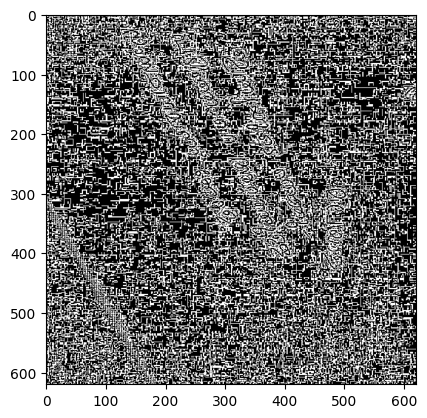

In [27]:
# Load the image
img = cv2.imread('mal-slant.jpeg')  # Load as grayscale

image = resize_image(img, 620, 620) 

thresh_img = thresholding(Image.fromarray(image))
plt.imshow(Image.fromarray(thresh_img))


# Step 1: Find the size of the image
height, width = find_image_size(thresh_img)

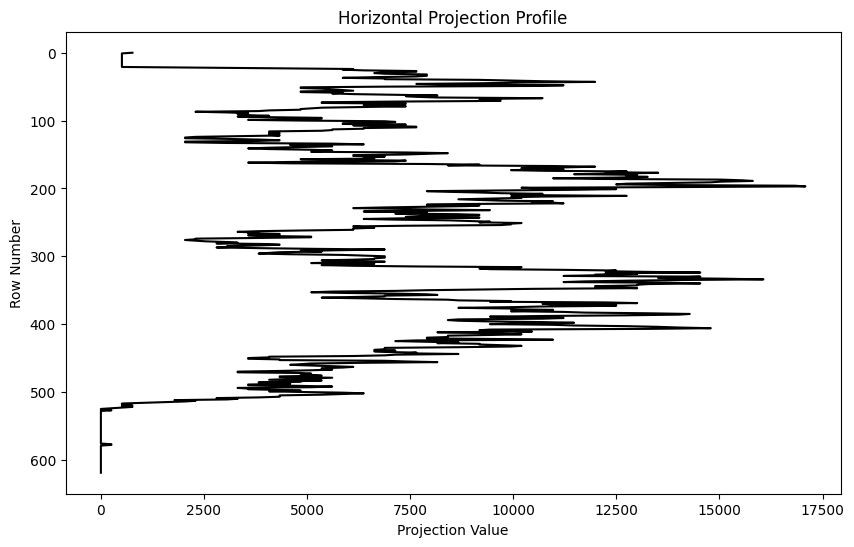

In [9]:
horizontal_projection = np.sum(thresh_img, axis=1)

# Create y-axis values (row numbers)
y_values = np.arange(thresh_img.shape[0])

# Plot the horizontal projection
plt.figure(figsize=(10, 6))
plt.plot(horizontal_projection, y_values, color='black')
plt.title('Horizontal Projection Profile')
plt.xlabel('Projection Value')
plt.ylabel('Row Number')
plt.gca().invert_yaxis()  # Invert y-axis to have row 0 at the top
plt.show()

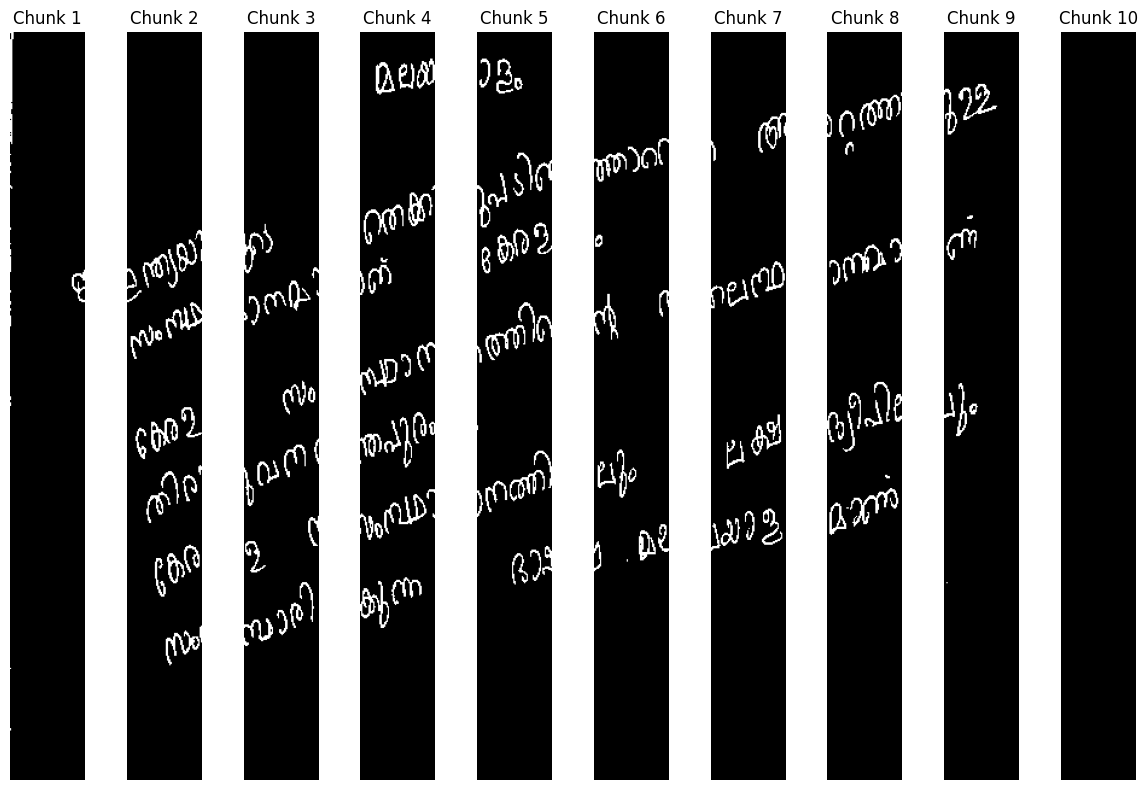

In [57]:

# Function to calculate horizontal projection
def calculate_horizontal_projection(image):
    return np.sum(image, axis=1)


# Divide the image into 5 vertical chunks
num_chunks = 10
chunked_images = divide_image_vertical(thresh_img, num_chunks)

# Display the segmented chunks
plt.figure(figsize=(12, 8))
for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    plt.imshow(chunk, cmap='gray')
    plt.title(f'Chunk {i+1}')
    plt.axis('off')  # Hide axis labels and ticks

plt.tight_layout()
plt.show()



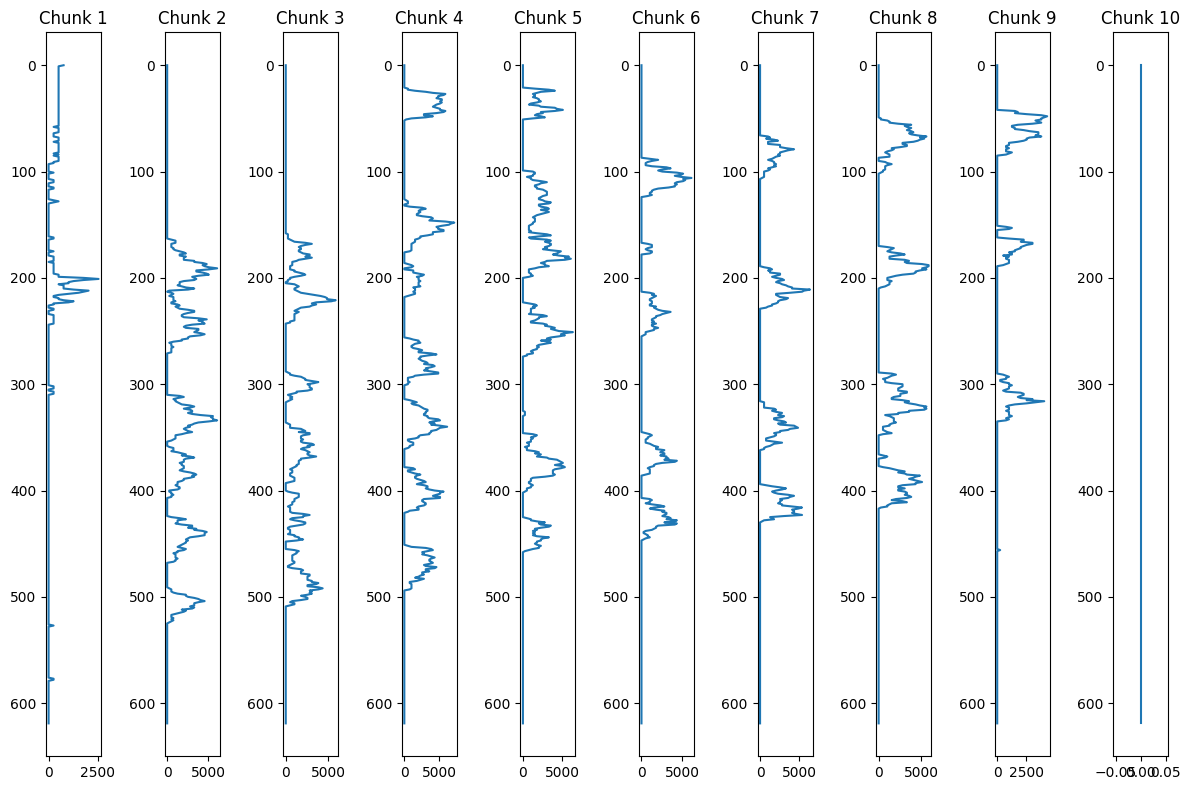

In [58]:
# Plot the horizontal projection profile for each chunk separately
plt.figure(figsize=(12, 8))
for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    horizontal_projection = calculate_horizontal_projection(chunk)
    y_values = np.arange(len(horizontal_projection))  # Generate y-values based on the length of horizontal_projection
    plt.plot(horizontal_projection, y_values)
    plt.title(f'Chunk {i+1}')
    plt.gca().invert_yaxis()  # Invert y-axis to have row 0 at the top

plt.tight_layout()
plt.show()


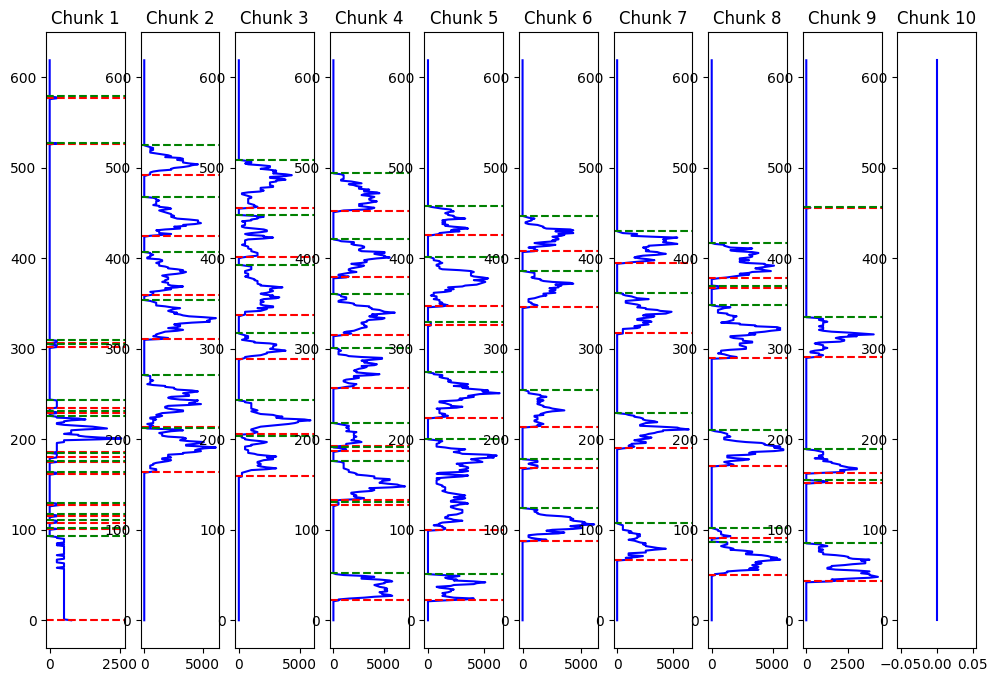

In [59]:
# Plot each chunk with its corresponding horizontal projection profile and detected start/end points
plt.figure(figsize=(12, 8))
start_points = []  # Initialize start points list
end_points = []  # Initialize end points list

for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    
    # Calculate horizontal projection
    horizontal_projection = calculate_horizontal_projection(chunk)
    y_values = np.arange(len(horizontal_projection))  # Row numbers
    
    # Plot the horizontal projection profile
    plt.plot(horizontal_projection, y_values, color='blue', label='Projection Profile')
    
    # Find starting and ending points for line segmentation
    start_chunk = []  # Initialize start points for the current chunk
    end_chunk = []  # Initialize end points for the current chunk
    start_found = False
    for j in range(len(horizontal_projection)):
        if horizontal_projection[j] == 0 and not start_found:
            continue
        elif horizontal_projection[j] > 0 and not start_found:
            start_chunk.append(j)  # Append start point to the current chunk's start points list
            start_found = True
        elif horizontal_projection[j] == 0 and start_found:
            end_chunk.append(j)  # Append end point to the current chunk's end points list
            start_found = False
    
    start_points.append(start_chunk)  # Append the current chunk's start points to the overall start points list
    end_points.append(end_chunk)  # Append the current chunk's end points to the overall end points list

    # Draw detected start and end points
    for start_point in start_chunk:
        plt.axhline(y=start_point, color='red', linestyle='--', label='Start Point')
    for end_point in end_chunk:
        plt.axhline(y=end_point, color='green', linestyle='--', label='End Point')
    
    # Set plot properties
    plt.title(f'Chunk {i+1}')

plt.show()


In [60]:
# len(start_points[0])

In [61]:
#  # Remove lines where the distance between start and end points is less than min_distance
# min_distance = 10

# i = 0
# while i < num_chunks:
#     j = 0
#     while j < len(start_points[i]) :
#         if abs(end_points[i][j] - start_points[i][j]) < min_distance:
#             del start_points[i][j]
#             del end_points[i][j]
#         else:
#             j += 1
#     i += 1

In [62]:
# len(start_points[0])

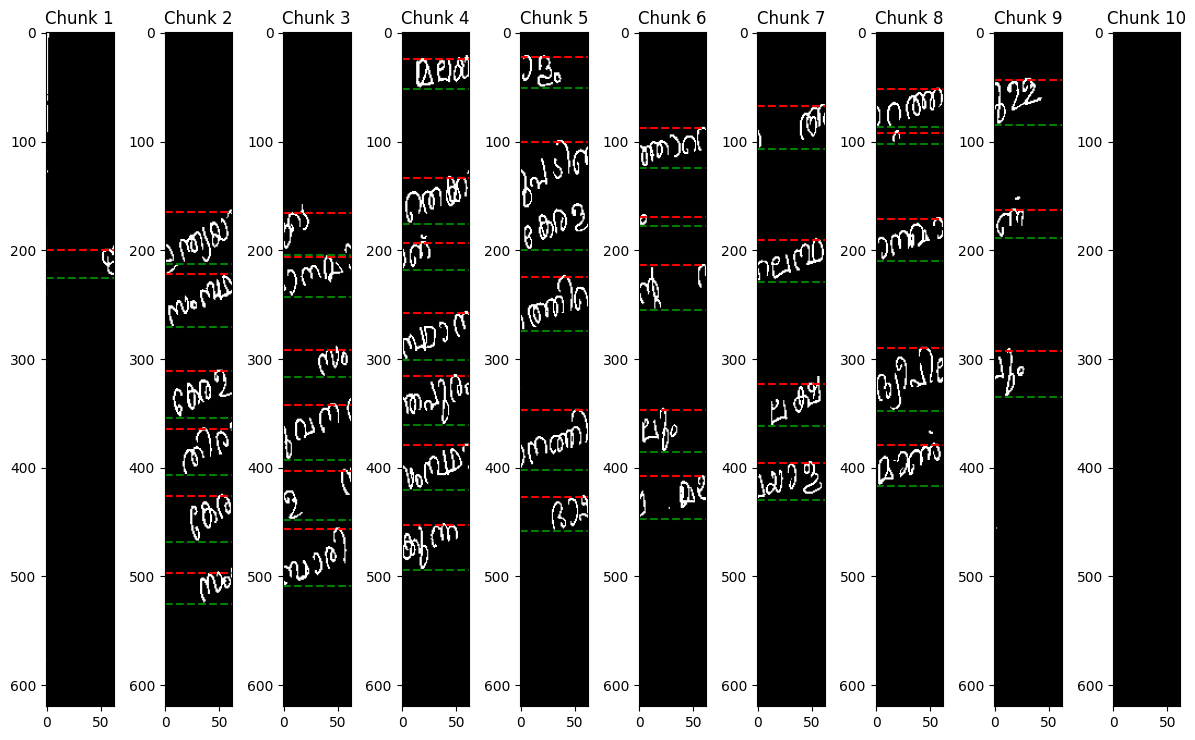

In [63]:

# Plot each chunk with its corresponding horizontal projection profile and detected start/end points
plt.figure(figsize=(12, 8))
start_points = []  # Initialize start points list
end_points = []  # Initialize end points list
for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    
    # Calculate horizontal projection
    horizontal_projection = calculate_horizontal_projection(chunk)
    y_values = np.arange(len(horizontal_projection))  # Row numbers
    
    # Plot the horizontal projection profile
    plt.imshow(chunk, cmap='gray')
    
    # Find starting and ending points for line segmentation
    start_chunk = []  # Initialize start points for the current chunk
    end_chunk = []  # Initialize end points for the current chunk
    start_found = False
    for j in range(len(horizontal_projection)):
        if horizontal_projection[j] == 0 and not start_found:
            continue
        elif horizontal_projection[j] > 1000 and not start_found:
            start_chunk.append(j)  # Append start point to the current chunk's start points list
            start_found = True
        elif horizontal_projection[j] == 0 and start_found:
            end_chunk.append(j)  # Append end point to the current chunk's end points list
            start_found = False

    # Remove lines where the distance between start and end points is less than min_distance
    min_distance = 5
    
    k = 0
    while k < len(start_chunk) :
        if abs(end_chunk[k] - start_chunk[k]) < min_distance:
            del start_chunk[k]
            del end_chunk[k]
        else:
            k += 1

    k = 0
    while k < len(start_chunk) :
        if abs(end_chunk[k] - start_chunk[k]) < min_distance:
            del start_chunk[k]
            del end_chunk[k]
        else:
            k += 1
            

    start_points.append(start_chunk)  # Append the current chunk's start points to the overall start points list
    end_points.append(end_chunk)  # Append the current chunk's end points to the overall end points list

    # Draw detected start and end points
    for start_point in start_chunk:
        plt.axhline(y=start_point, color='red', linestyle='--', label='Start Point')
    for end_point in end_chunk:
        plt.axhline(y=end_point, color='green', linestyle='--', label='End Point')
    
    # Set plot properties
    plt.title(f'Chunk {i+1}')
    plt.tight_layout()

plt.show()


In [64]:
print(start_points)

[[200], [165, 222, 311, 364, 426, 497], [166, 206, 292, 342, 403, 456], [24, 134, 193, 258, 316, 379, 453], [22, 100, 225, 347, 427], [88, 169, 214, 347, 408], [67, 191, 323, 396], [52, 92, 171, 290, 379], [43, 163, 293], []]


In [65]:
print(end_points)

[[226], [213, 271, 354, 407, 468, 525], [204, 243, 317, 393, 448, 509], [52, 176, 218, 301, 361, 421, 494], [51, 200, 274, 402, 458], [124, 178, 255, 386, 447], [107, 229, 362, 430], [87, 102, 210, 348, 417], [85, 189, 335], []]


In [66]:
def find_connected_components(image):
    # Convert the image to binary
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Find connected components
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
    return num_labels, labels, stats

def find_average_height(stats):
    heights = stats[:, 3]  # Get the heights of all connected components
    return np.mean(heights)


In [67]:
#  step 1: find connected components
num_labels, labels, stats = find_connected_components(thresh_img)
    
# Step 2: Find average height
average_height = find_average_height(stats)


In [68]:
print(average_height)

21.505494505494507


In [69]:
i = 0
while(i < len(start_points)):
    j = 0
    while(j < len(start_points[i])):
        if abs(end_points[i][j-1]  - start_points[i][j] ) < average_height/4 :
            del start_points[i][j]
            del end_points[i][j-1]
        else:
            j += 1
    i += 1 


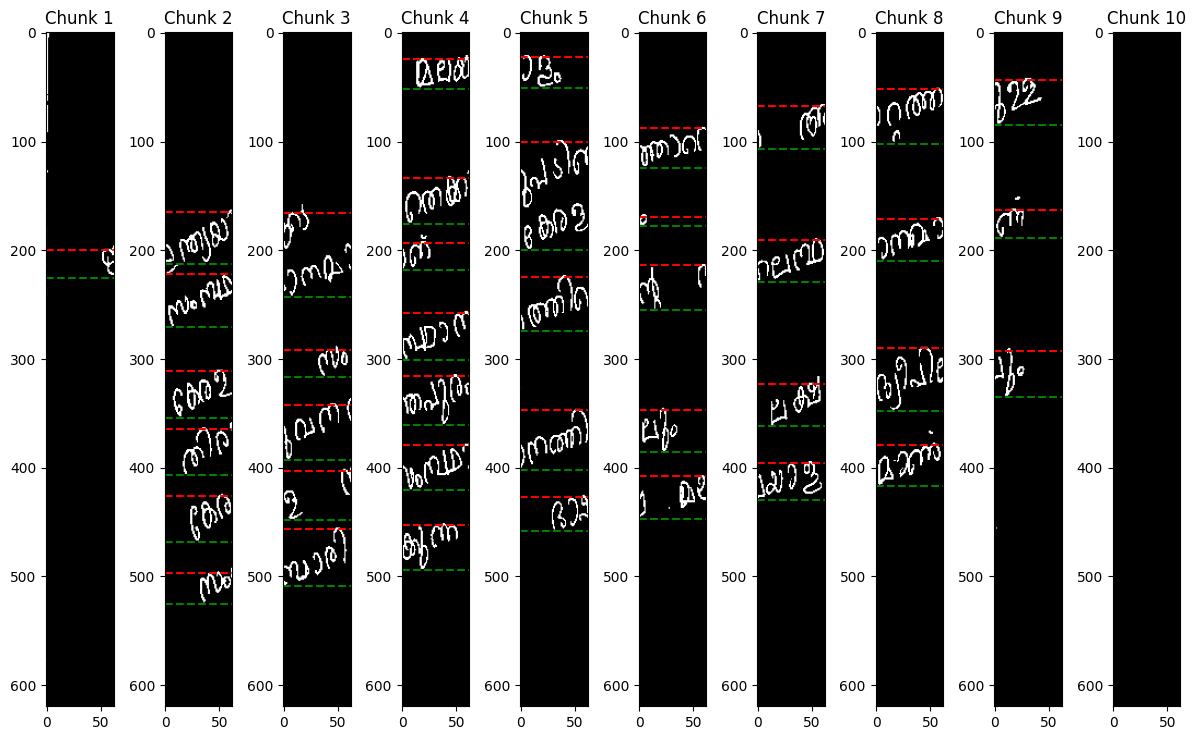

In [70]:

# Plot each chunk with its corresponding horizontal projection profile and detected start/end points
plt.figure(figsize=(12, 8))
for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    
    # Plot the horizontal projection profile
    plt.imshow(chunk, cmap='gray')

    # Draw detected start and end points
    for start_point in start_points[i]:
        plt.axhline(y=start_point, color='red', linestyle='--', label='Start Point')
    for end_point in end_points[i]:
        plt.axhline(y=end_point, color='green', linestyle='--', label='End Point')
    
    # Set plot properties
    plt.title(f'Chunk {i+1}')
    plt.tight_layout()

plt.show()


In [71]:
print(start_points)

[[200], [165, 222, 311, 364, 426, 497], [166, 292, 342, 403, 456], [24, 134, 193, 258, 316, 379, 453], [22, 100, 225, 347, 427], [88, 169, 214, 347, 408], [67, 191, 323, 396], [52, 171, 290, 379], [43, 163, 293], []]


In [72]:
print(end_points)

[[226], [213, 271, 354, 407, 468, 525], [243, 317, 393, 448, 509], [52, 176, 218, 301, 361, 421, 494], [51, 200, 274, 402, 458], [124, 178, 255, 386, 447], [107, 229, 362, 430], [102, 210, 348, 417], [85, 189, 335], []]


In [73]:
i = 0
while i < len(start_points):
    j = 0
    while j < len(start_points[i]):
        if abs(end_points[i][j] - start_points[i][j]) > 3 * average_height:
            # Step 3: Find the rows corresponding to minimum HP value within the line segment
            start_row = start_points[i][j]
            end_row = end_points[i][j]
            min_hp_row = np.argmin(np.sum(chunked_images[i][start_row + 10:end_row, :], axis=1)) + start_row

            

            # Step 4: Segment the line segment into two at the minimum HP value position
            new_end_row = min_hp_row
            new_start_row = new_end_row + 1

            print('chunk idx =', i, 'start =',start_row, 'end = ', end_row,'n_start =', new_start_row, 'n_end = ', new_end_row, 'min_hp_row = ', min_hp_row)
            
            # Update start and end points
            end_points[i].insert(j, new_end_row)
            start_points[i].insert(j+1 , new_start_row)
            
            j += 2  # Move to the next line segment after inserting the new start and end points
        else:
            j += 1
    i += 1



chunk idx = 2 start = 166 end =  243 n_start = 195 n_end =  194 min_hp_row =  194
chunk idx = 4 start = 100 end =  200 n_start = 142 n_end =  141 min_hp_row =  141


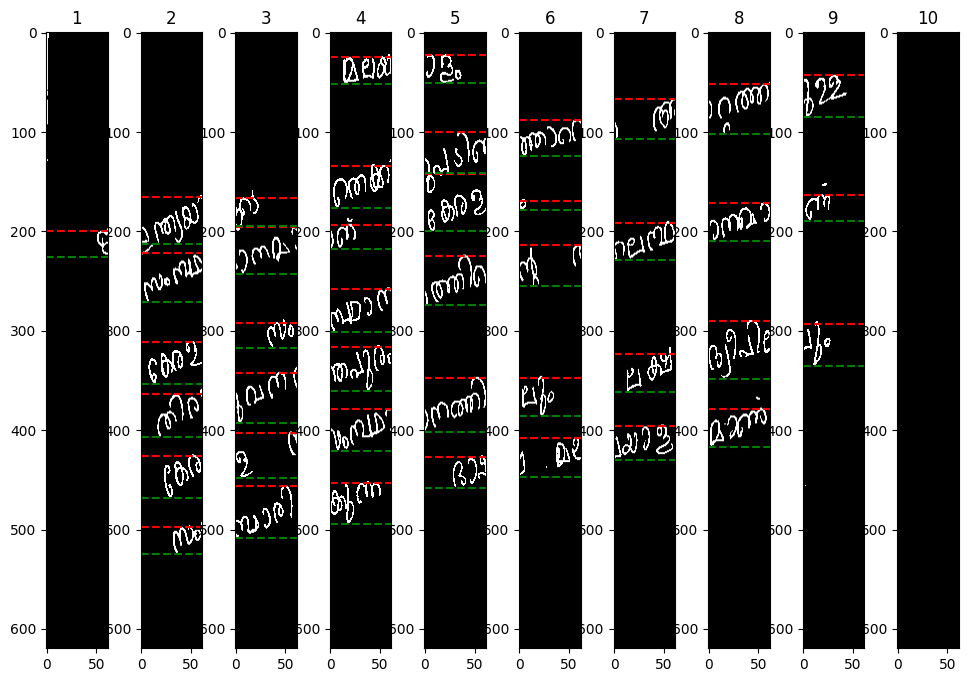

In [76]:

# Plot each chunk with its corresponding horizontal projection profile and detected start/end points
plt.figure(figsize=(12, 8))
for i, chunk in enumerate(chunked_images):
    plt.subplot(1, num_chunks, i + 1)
    
    # Plot the horizontal projection profile
    plt.imshow(chunk, cmap='gray')

    # Draw detected start and end points
    for start_point in start_points[i]:
        plt.axhline(y=start_point, color='red', linestyle='--', label='Start Point')
    for end_point in end_points[i]:
        plt.axhline(y=end_point, color='green', linestyle='--', label='End Point')

    # Hide x and y axis ticks and labels
    # plt.xticks([])
    # plt.yticks([])
    
    # Set plot properties
    plt.title(f'{i+1}')
    # plt.tight_layout()


plt.show()
